# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Menyiapkan data yang akan diguankan

https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

In [ ]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
data = pd.read_csv(url, delimiter=';')
data.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

tipe data masing-masing kolom sudah sesuai

In [ ]:
print("1. Ringkasan Statistik Data:")
print(data.describe())

1. Ringkasan Statistik Data:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.

mengetahui ringkasan statistik dasar tiap kolom

In [ ]:
print("\n2. Informasi Dataset:")
print(f"Jumlah Baris: {data.shape[0]}")
print(f"Jumlah Kolom: {data.shape[1]}")


2. Informasi Dataset:
Jumlah Baris: 4424
Jumlah Kolom: 37


mengetahui jumlah baris dan kolom

In [ ]:
print("\n3. Missing Values:")
print(data.isnull().sum())


3. Missing Values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment             

tidak ada missing values

In [ ]:
data.duplicated().sum()

0

tidak ada data yang duplicate

In [ ]:
data.corr(numeric_only = True)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime_evening_attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous_qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous_qualification_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mothers_qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Fathers_qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


cek korelasi antar fitur

Correlation Heatmap:


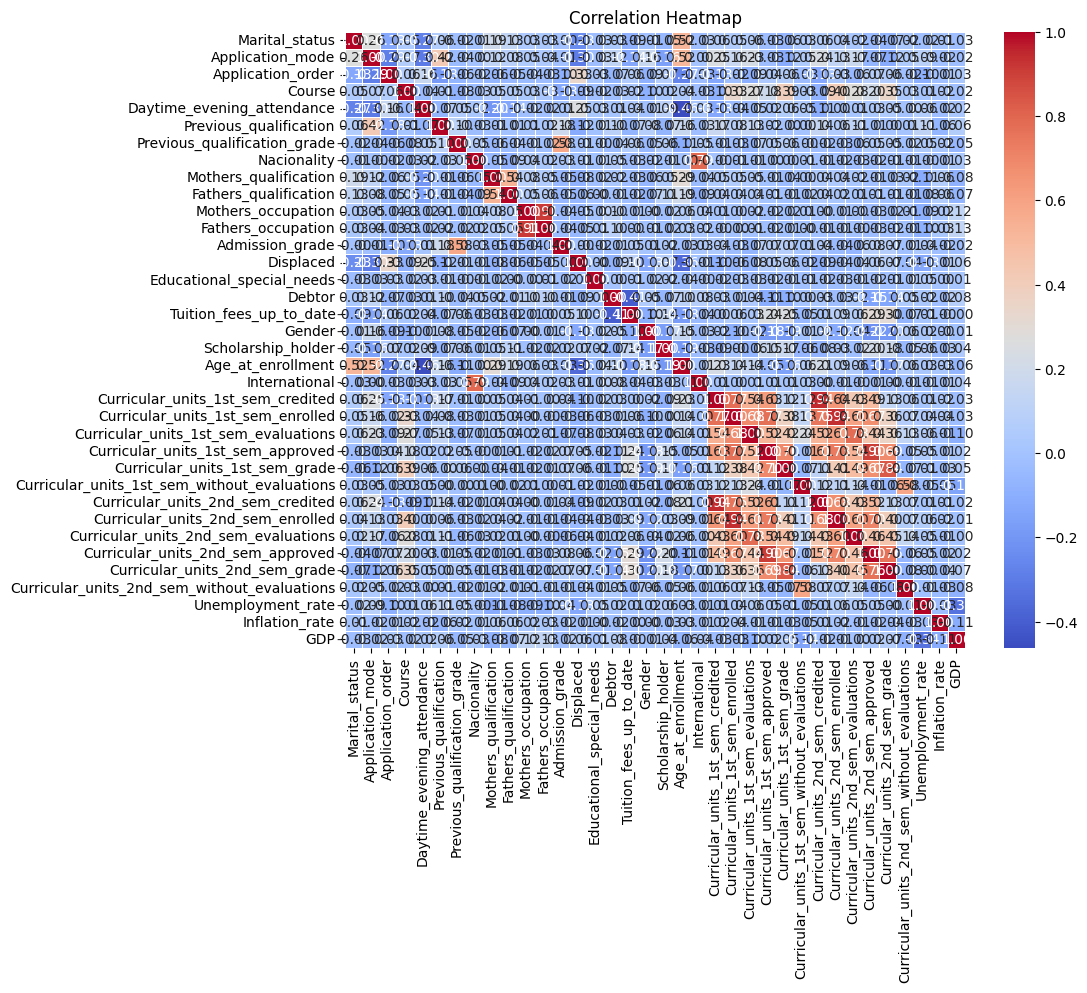

In [ ]:
print("Correlation Heatmap:")
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
status_dummies = pd.get_dummies(data['Status'])
status_dummies.columns = ['Status_' + status for status in status_dummies.columns]
data = pd.concat([data, status_dummies], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

memisahkan keterangan dropout, enrolled dan graduate pada fitur status

In [ ]:
target_columns = ['Status_Dropout', 'Status_Enrolled', 'Status_Graduate']

for target_column in target_columns:

    numeric_columns = data.select_dtypes(include=np.number).columns

    correlation_with_target = data[numeric_columns].corrwith(data[target_column])

    sorted_correlation = correlation_with_target.sort_values(ascending=False)

    print("Korelasi antara fitur-fitur dan kolom target", target_column + ":")
    print(sorted_correlation)
    print("\n")

Korelasi antara fitur-fitur dan kolom target Status_Dropout:
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Fathers_qualification                           0.018295
Unemployment_rate                               0.012980
Nacionality                                     0.008346
Educational_special_needs                       0.002806
International                                  -0.010360
Mothers_occupation                             -0.021999
Fathers_occupation         

melihat korelasi antara fitur, status drpout, status enrolled dan status graduate terhadap fitur lain

terlihat 5 fitur terbesar yang berkorelasi dengan status dropout sebagai berikut:
- Age_at_enrollment                               0.254215
- Debtor                                          0.229407
- Gender                                          0.203983
-
Application_mode                                0.198458
- Marital_status                                  0.093712

ini berarti fitur-fitur tersebut paling berpengaruh terhadap status dropout

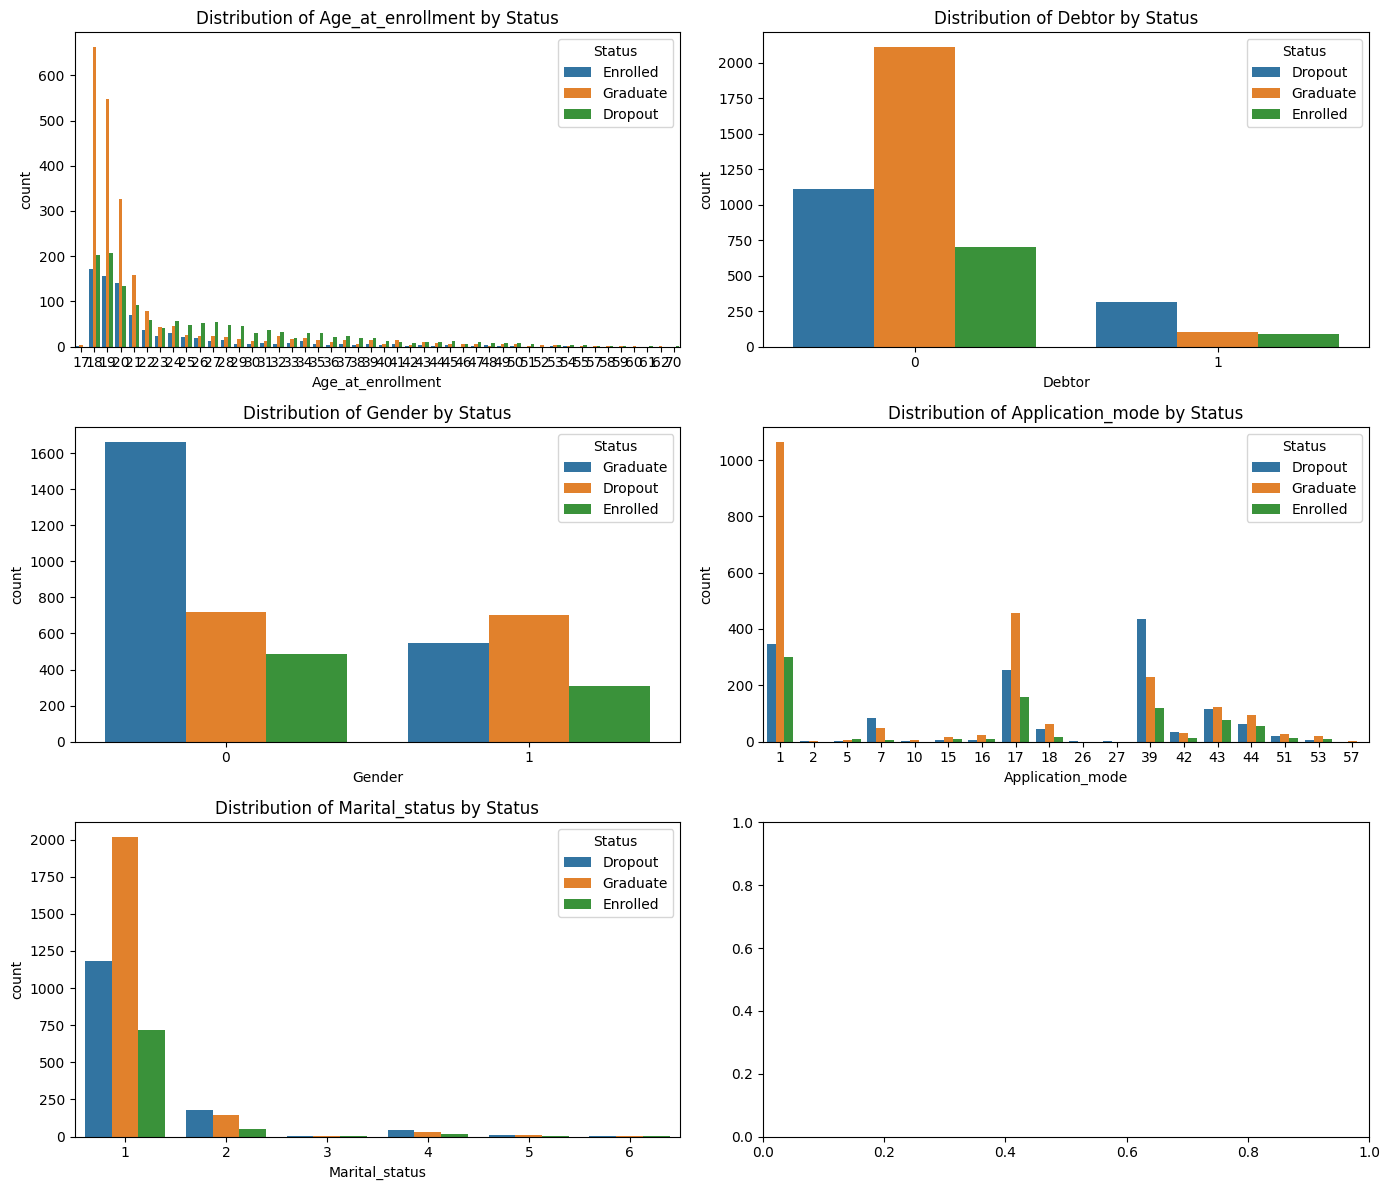


Persentase Dropout berdasarkan Age_at_enrollment:
Age_at_enrollment
17      0.000000
18     19.498069
19     22.722283
20     22.203673
21     28.881988
22     33.333333
23     37.962963
24     42.748092
25     50.537634
26     55.319149
27     60.439560
28     56.626506
29     68.181818
30     61.224490
31     65.454545
32     54.098361
33     44.444444
34     48.333333
35     59.183673
36     60.000000
37     54.761905
38     65.517241
39     47.368421
40     56.521739
41     35.483871
42     53.846154
43     44.000000
44     47.619048
45     59.090909
46     50.000000
47     61.111111
48     63.636364
49     53.846154
50     56.250000
51     71.428571
52      0.000000
53     42.857143
54     57.142857
55     60.000000
57     50.000000
58     66.666667
59     66.666667
60      0.000000
61    100.000000
62      0.000000
70    100.000000
dtype: float64

Persentase Dropout berdasarkan Debtor:
Debtor
0    28.283601
1    62.027833
dtype: float64

Persentase Dropout berdasarkan Gender:
Ge

In [ ]:
features = ['Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode', 'Marital_status']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='Status', data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Status')

plt.tight_layout()
plt.show()

for feature in features:
    print(f"\nPersentase Dropout berdasarkan {feature}:")
    dropout_dist = data.groupby([feature, 'Status']).size().unstack().fillna(0)
    dropout_percentage = dropout_dist['Dropout'] / dropout_dist.sum(axis=1) * 100
    sorted_dropout_percentage = dropout_percentage.sort_values(ascending=False)
    print(dropout_percentage)


## Data Preparation / Preprocessing

In [ ]:
df = data.copy()

In [ ]:
df['Marital_status'] = df['Marital_status'].replace({
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
})

df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].replace({
    1: 'daytime',
    0: 'evening'
})

df['Displaced'] = df['Displaced'].replace({
    1: 'yes',
    0: 'no'
})

df['Educational_special_needs'] = df['Educational_special_needs'].replace({
    1: 'yes',
    0: 'no'
})

df['Debtor'] = df['Debtor'].replace({
    1: 'yes',
    0: 'no'
})

df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].replace({
    1: 'yes',
    0: 'no'
})

df['Gender'] = df['Gender'].replace({
    1: 'male',
    0: 'female'
})

df['International'] = df['International'].replace({
    1: 'yes',
    0: 'no'
})

df['Scholarship_holder'] = df['Scholarship_holder'].replace({
    1: 'yes',
    0: 'no'
})

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    191: 'cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries, and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

df['Mothers_occupation'] = df['Mothers_occupation'].map(occupation_mapping)
df['Fathers_occupation'] = df['Fathers_occupation'].map(occupation_mapping)

nacionality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17 : 'Lithuanian',
    21 : 'Angolan',
    22 : 'Cape Verdean',
    24 : 'Guinean',
    25 : 'Mozambican',
    26 : 'Santomean',
    32 : 'Turkish',
    41 : 'Brazilian',
    62 : 'Romanian',
    100 : 'Moldova (Republic of)',
    101 : 'Mexican',
    103 : 'Ukrainian',
    105 : 'Russian',
    108 : 'Cuban',
    109 : 'Colombian'
}

df['Nacionality'] = df['Nacionality'].map(nacionality_mapping)

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df['Course'] = df['Course'].map(course_mapping)

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

df['Application_mode'] = df['Application_mode'].map(application_mode_mapping)

mengubah angka angka menjadi teks agar memudahkan visualisasi data

In [ ]:
df.to_csv('data_clean.csv', index=False)

menyimpan data_clean

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Dropout,Status_Enrolled,Status_Graduate
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,1,122.0,Portuguese,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
1,single,International student (bachelor),1,Tourism,daytime,1,160.0,Portuguese,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,False,False,True
2,single,1st phase - general contingent,5,Communication Design,daytime,1,122.0,Portuguese,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,1,122.0,Portuguese,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,False,False,True
4,married,Over 23 years old,1,Social Service (evening attendance),evening,1,100.0,Portuguese,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,False,False,True


terlihat bahwa fitur status sudah terbagi menjadi 3 bagian
- status_dropout
- status_enrolled
- status_graduate

## Modeling

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data_train = data[data['Status']!='Enrolled']

memisahkan data enrolled

In [ ]:
data_train['Status'] = data_train['Status'].replace({'Graduate': 1, 'Dropout': 0})

<ipython-input-87-ad72e946ae21>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Status'] = data_train['Status'].replace({'Graduate': 1, 'Dropout': 0})
<ipython-input-87-ad72e946ae21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Status'] = data_train['Status'].replace({'Graduate': 1, 'Dropout': 0})


mengubah value di status untuk memudahkan prediksi

In [ ]:
data_train.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


data sudah terubah

In [ ]:
from sklearn.pipeline import Pipeline # Importing Pipeline from sklearn.pipeline
from sklearn.impute import SimpleImputer # Importing SimpleImputer from sklearn.impute
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Importing OneHotEncoder
from sklearn.compose import ColumnTransformer # Importing ColumnTransformer


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Instead of reading the DataFrame again, use the existing DataFrame 'data'
original_data = data.copy()  # Use the existing DataFrame

selected_features = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']
data_for_scaler = original_data[selected_features]

# Latih ulang scaler dengan 10 fitur saja
scaler = StandardScaler()
scaler.fit(data_for_scaler)

StandardScaler()

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:

# Memisahkan fitur (X) dan target (y)
X = data_train.drop(['Status'], axis=1)
X = X[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = data_train[['Status']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can select numerical and categorical columns from the DataFrame X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()


# Preprocessing numerical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing categorical
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Split data
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

Running model

## Evaluation


Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Accuracy: 0.89
Confusion Matrix:
[[220  57]
 [ 21 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       277
           1       0.88      0.95      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726


Evaluating Random Forest...
Accuracy: 0.89
Confusion Matrix:
[[224  53]
 [ 28 421]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726


Evaluating Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.90
Confusion Matrix:
[[227  50]
 [ 26 423]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       277
           1       0.89      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726


Evaluating Decision Tree...
Accuracy: 0.85
Confusion Matrix:
[[219  58]
 [ 50 399]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       277
           1       0.87      0.89      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726


Evaluating SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Confusion Matrix:
[[143 134]
 [ 11 438]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.66       277
           1       0.77      0.98      0.86       449

    accuracy                           0.80       726
   macro avg       0.85      0.75      0.76       726
weighted avg       0.83      0.80      0.78       726


Saving the best model: GradientBoostingClassifier()
Model saved as 'best_model.pkl'


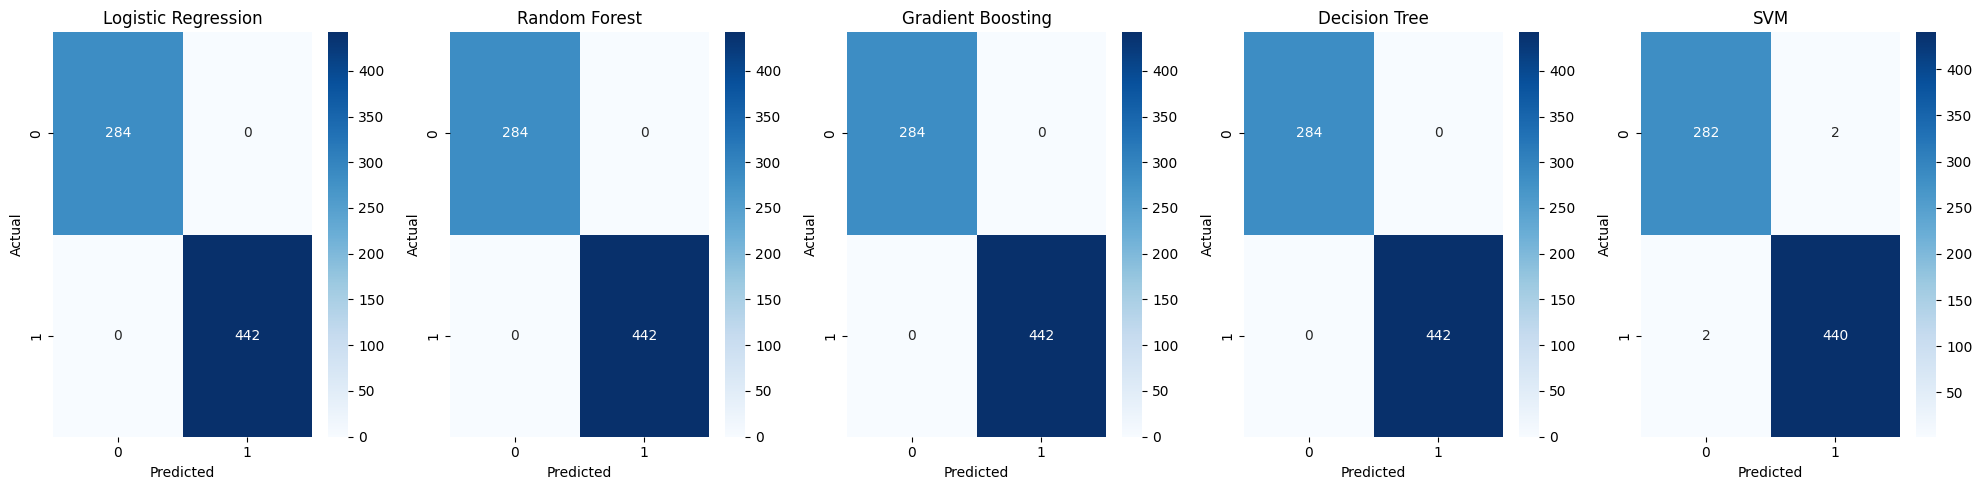

In [ ]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

if best_model:
    print(f"\nSaving the best model: {best_model}")
    joblib.dump(best_model, 'best_model.pkl')
    print("Model saved as 'best_model.pkl'")


fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

Logistic Regression, Random Forest, dan Gradient Boosting menunjukkan performa yang hampir sama dengan akurasi 91%, sementara Decision Tree memiliki akurasi lebih rendah (86%).

Logistic Regression dan Gradient Boosting memiliki performa yang lebih baik dalam mendeteksi kelas 0 (tidak dropout), sementara Random Forest unggul dalam mendeteksi kelas 1 (dropout).

Secara keseluruhan, Logistic Regression dan Random Forest adalah model yang dapat dipertimbangkan sebagai model terbaik untuk kasus ini.